Author: Irsyad Adam

Date: Jan 28 2022

## HRpEF/HRrEF Network

For Graph Analysis using Neo4j Graph Algorithms, we need to create a cypher projection and set the graph in memory:

@cypher:

    CALL gds.graph.create(
    'KG',
        ["Category", "Drug", "PMID", "Protein"],
        {
            HAS_RELATED_DRUG: {orientation: 'UNDIRECTED'},
            HAS_UNIREF_ID: {orientation: 'UNDIRECTED'},
            IS_IN_CATEGORY: {orientation: 'UNDIRECTED'},
            PMID_TARGET: {orientation: 'UNDIRECTED'}
        }
    )



In [1]:
from neo4j import GraphDatabase 
import pandas as pd

from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
class degree():
    """Class to run LinkPred"""
    def __init__(self) -> None:
        self.driver = GraphDatabase.driver("neo4j://localhost:7687", auth=("neo4j", "heart"))

    def close(self) -> None:
        self.driver.close()

    @classmethod
    def algo(cls, tx) -> any:
        """
        :param cls: is the class
        :param tx: is the transaction (documented in neo4j)
        :return: result.data() is the data of algo
        """
        query = ("""
        CALL gds.degree.stream("KG")
        YIELD nodeId, score
        RETURN LABELS(gds.util.asNode(nodeId)) AS Type, nodeId as ID, score AS Degree
        ORDER BY Degree DESCENDING, ID DESC, Type DESC
        """)
        result = tx.run(query)
        return result.data()


    def run_algo(self) -> any:
        """
        :param self:
        :return: result is the dataframe from the degree centrality
        """
        result = self.driver.session().write_transaction(self.algo)
        result = pd.DataFrame(result)
        return result

In [6]:
hello = degree()

In [37]:
data = hello.run_algo()

#editing dataframe
data["Type"] = data["Type"].str[0]
data["Frequency"] = data["Degree"].map(data["Degree"].value_counts())
data

,Type,ID,Degree,Frequency
0,Drug,819,310.0,1
1,PMID,1155,251.0,1
2,PMID,1122,230.0,1
3,PMID,1169,217.0,1
4,PMID,1153,211.0,1
...,...,...,...,...
12795,Protein,235,1.0,10676
12796,Protein,232,1.0,10676
12797,Protein,213,1.0,10676
12798,Protein,156,1.0,10676


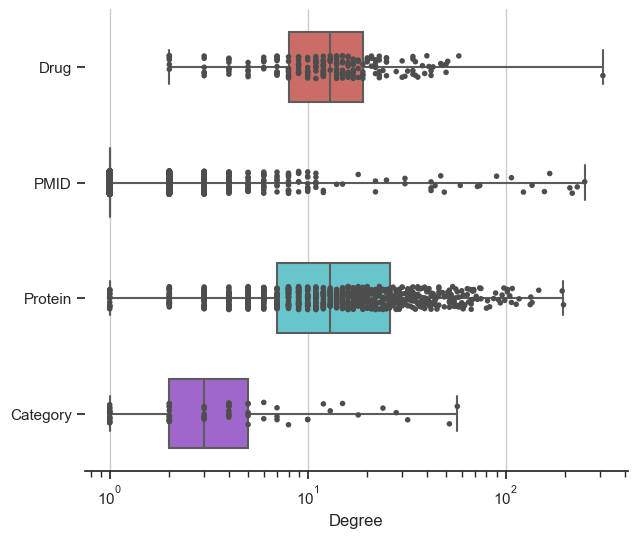

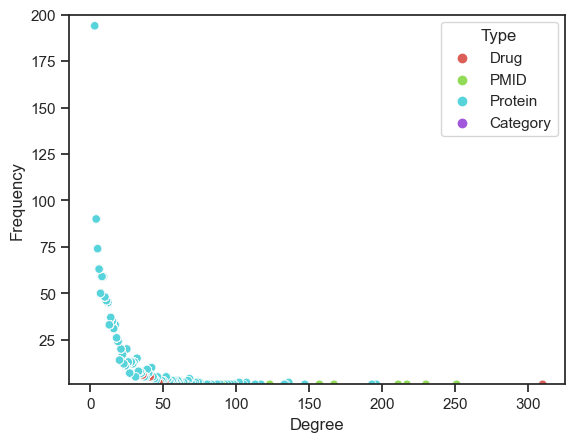

In [57]:
def barplot(x, y, data):
    """
    :param x: is the x axis
    :param y: is the y axis
    :param data: is the data used
    """
    sns.set_theme(style="ticks")

    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(figsize=(7, 6))
    ax.set_xscale("log")

    # Plot the orbital period with horizontal boxes
    sns.boxplot(x=x, y=y, data=data,
        whis=[0, 100], width=.6, palette="hls")

    # Add in points to show each observation
    sns.stripplot(x=x, y=y, data=data,
                size=4, color=".3", linewidth=0)

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.set(ylabel="")
    sns.despine(trim=False, left=True)

    plt.show()


barplot("Degree", "Type", data)

ax = sns.scatterplot(data=data, x="Degree", y="Frequency", hue="Type", palette="hls")
ax.set(ylim=(1,200))
plt.show()

## Ion Channel Network

##### Since the dbms from local machine hosts the same URI every time a new instance of a database is created, we can run the same function for the exact same class methods to retrieve the data

@cypher:

    CALL gds.graph.create(
    'KG',
        ["MeSH", "Document", "Protein", "Drug"],
        {
            MENTIONS: {orientation: 'UNDIRECTED'},
            TARGET: {orientation: 'UNDIRECTED'},
            ASSIGNS: {orientation: 'UNDIRECTED'}
        }
    )

In [65]:
data = hello.run_algo()

#editing dataframe
data["Type"] = data["Type"].str[0]
data["Frequency"] = data["Degree"].map(data["Degree"].value_counts())
data

,Type,ID,Degree,Frequency
0,Protein,763,14519.0,1
1,Protein,787,11507.0,1
2,Protein,661,9430.0,1
3,Protein,717,6757.0,1
4,Protein,739,6360.0,1
...,...,...,...,...
96248,Protein,780,0.0,380
96249,Protein,714,0.0,380
96250,Protein,706,0.0,380
96251,Protein,691,0.0,380


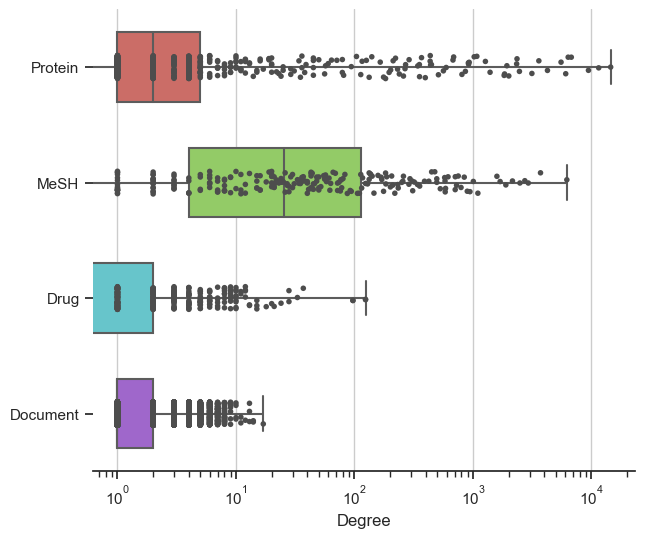

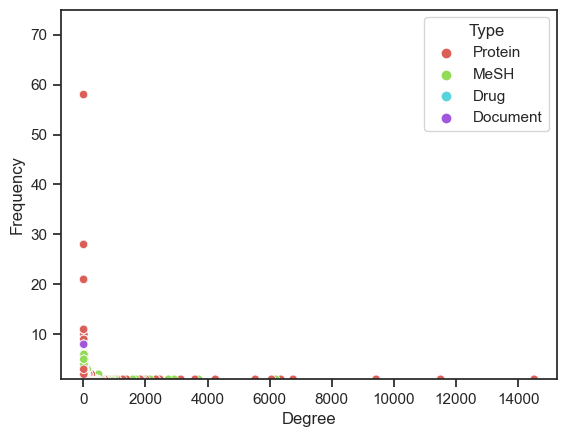

In [67]:
barplot("Degree", "Type", data)

ax = sns.scatterplot(data=data, x="Degree", y="Frequency", hue="Type", palette="hls")
ax.set(ylim=(1,75))
plt.show()